# [HW15] Visualizing MNIST

## 1.1 Why Visualizing?

사람은 기본적으로 머신러닝을 이해할 수 없습니다. 머신러닝이 너무 복잡하지 않아도, 사람은 머신러닝을 완벽하게 이해할 수 없습니다. 이것은 사람이 태생적으로 가진 핸디캡이 있기 때문입니다. 

사람은 3차원 공간에서 살고 있습니다. 3차원 공간 속에는 2차원, 1차원도 존재합니다. 우리가 보고 느낄 수 있는 것들은 1,2,3차원 입니다. 하지만 머신러닝에서는 다루는 차원의 수가 정말 큽니다. 우리가 지난 실습 시간에 다룬 부품만 해도 만개가 넘는 차원을 가지고 있었습니다. 그래서 우리는 매우 간단한 형태이더라도 차원의 수가 높아지면 이해할 수 없어집니다. 

그래서 우리는 고차원 공간을 우리가 이해할 수 있는 저차원으로 변환하는 기술을 연구하였습니다. 이를 dimensionality reduction이라고 합니다. 

이러한 기술을 통해서 머신러닝을 더 직접적으로 이해할 수 있게 됩니다. 

이제부터 dimensionality reduction을 직접 수행해 보겠습니다. 그를 위해서 Mnist dataset을 불러오도록 하겠습니다. 

## 1.2 MNIST

MNIST는 가장 간단한 이미지 데이터셋입니다. 이것은 28 x 28 pixel 의 숫자 이미지로 구성되어있습니다. 실제로 데이터를 불러와서 확인해 보겠습니다. 

먼저 불러온 데이터를 이미지와 그 숫자가 무엇인지를 알려주는 label로 나눠주겠습니다. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', cache=False)


In [ ]:
X = mnist.data.astype('float32').to_numpy()
y = mnist.target.astype('int64').to_numpy()

이제 이미지 하나를 선택해서 보겠습니다. 

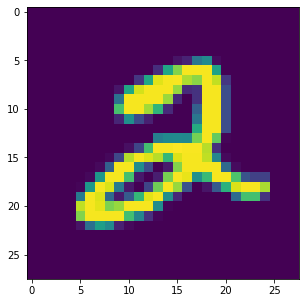

label : 2


In [ ]:
plt.figure(figsize=(5,5))
idx = 5

grid_data = X[idx].reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none")
plt.show()

print('label : {}'.format(y[idx]))

각각의 이미지는 28 x 28 pixel들을 가지고 있기 때문에 우리는 $28 \times 28 = 784$ 차원의 벡터를 가지게 됩니다. 하지만 784차원의 공간에서 우리의 MNIST 가 차지하는 공간은 매우 작을 것입니다. 784 차원에는 매우매우 많은 벡터들이 존재합니다. 랜덤하게 하나를 뽑아서 이미지로 나타내 보겠습니다. 

<Figure size 432x288 with 0 Axes>

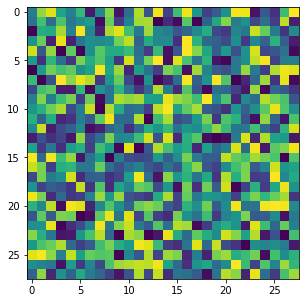

In [ ]:
plt.clf()
plt.figure(figsize=(5,5))

rand_img = np.random.rand(28,28)
plt.imshow(rand_img)

plt.show()

이렇게 수많은 이미지들 중에 숫자를 나타내는 이미지는 매우 드물 것입니다. 그렇기 때문에 차지하는 차원도 더 작을 것입니다. 

그래서 우리는 이 매우 드문 것들을 더 작은 차원으로 내리려는 노력을 할 것입니다. 

수업 때 배운 PCA 방법을 사용해서 나타내 보겠습니다. 



## 1.3 2D Visualization using PCA

PCA 는 Principal Components Analysis 의 약자로, 데이터가 가장 흩어져있는 축을 찾아서 그곳으로 사영해서 원하는 차원 개수만큼 줄이는 방법입니다. 

데이터가 가장 흩어져있는 축이라는 말은 가장 variance 가 커지게 하는 축이라는 말과 같습니다. 

PCA를 scikit-learn 패키지를 활용해서 나타내면서 이해해보도록 하겠습니다. 

### 1.3.1 PCA using Scikit-Learn

먼저 42000개의 데이터는 개수가 너무 많기 때문에 개수를 좀 줄여서 15000개를 가지고 진행하겠습니다. 

In [ ]:
labels = y[:15000]
data = X[:15000]

print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


그리고 feature의 개수가 매우 많이 때문에 정규화를 시켜줍니다. 이전 실습에서도 사용했던 z-score 정규화를 시켜주겠습니다. Sklearn 패키지 안의 StandardScaler 함수를 통해서 진행하겠습니다. 

In [ ]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [ ]:
sample_data = standardized_data

이제 scikit-learn 안의 PCA 패키지를 가져와서 적용해보도록 하겠습니다. 

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()

2차원으로 축소를 할 것이기 때문에 number of components를 2로 해주겠습니다.

In [ ]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


원래 우리가 가지고 있던 데이터는 784차원이었는데 PCA를 통해서 2로 줄어든 것을 확인할 수 있습니다. 

이제 이것을 시각화해서 보도록 하겠습니다. 라벨마다 색을 부여해서 시각화하겠습니다. 

In [ ]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


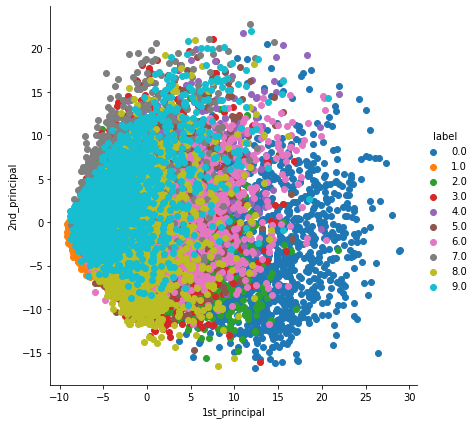

In [ ]:
import seaborn as sn

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

이렇게 우리의 MNIST 데이터셋을 2D로 차원을 축소해서 시각화를 해보았습니다. 비슷한 라벨의 이미지들끼리 모여있는 것을 보아 잘 축소된 것을 알 수 있습니다. 

다음은 패키지를 사용하는 것이 아닌 직접 eigen vector를 구하고, 데이터들을 사영시키면서 차원 축소를 진행해보겠습니다. 수업시간에 언급한 내용이 아니기 때문에 가벼운 마음으로 보시면 됩니다! 

### 1.3.2 Implement PCA

먼저, eigen value와 eigen vector를 구하기 위해서 공분산 행렬을 먼저 구해보도록 하겠습니다. 

코드를 통해서 구해보도록 하겠습니다. 

이 때 우리가 이미 z-score normalization을 해주었기 때문에 sample_data의 평균이 0입니다. 그래서 covariance matrix 를 구하는 식이 다음과 같이 간단해집니다. 

$$Cov(X, X) = \text{E}\left(\left(X - \bar{X}\right)\left(X - \bar{X}\right)^\top\right) =\text{E}\left(XX^\top\right) $$

여기서의 $X$ 는 (차원 수 x 데이터 개수) 의 형태의 matrix 이기 때문에 우리의 예시에서는 transpose 시켜서 진행하도록 하겠습니다. 

In [ ]:
#find the co-variance matrix which is : A^T * A
# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [ ]:
sample_data.mean()

7.635882e-10

이제 구한 공분산 행렬을 가지고, scipy 패키지 안의 eigh 함수를 통해서 eigen value와 eigen vector를 구하도록 하겠습니다. 

우리는 2D로 차원을 축소할 것이기 때문에 가장 큰 두개의 값을 선정해서 구해보도록 하겠습니다. 

In [ ]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.
# 아 eigval이 784개이니까(메트릭스 linearly indep 여부는? 이미 수직인 차원 다루는거라 ㄱㅊ군), 그중 제일 큰애 2개
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


이제 구한 eigen vector를 축으로 우리의 데이터를 사영시키도록 하겠습니다. 

In [ ]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [ ]:
labels.shape

(15000,)

이제 우리의 데이터는 784차원에서 2차원으로 줄어들게 되었습니다. 

이제 각 라벨마다 색을 부여해서 시각화하도록 하겠습니다. 

In [ ]:
import pandas as pd

# appending label to the 2d projected data(vertical stack)
new_coordinates = np.vstack((new_coordinates, labels.reshape(1,-1))).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())
#(0,1,2,3,4 are Xi other are principal axis)

   1st_principal  2nd_principal  label
0      -4.457050       0.960769    5.0
1      -7.397793      -8.658155    0.0
2       9.640693      -2.082853    4.0
3      -3.356075       7.187464    1.0
4       2.979882       4.933888    9.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


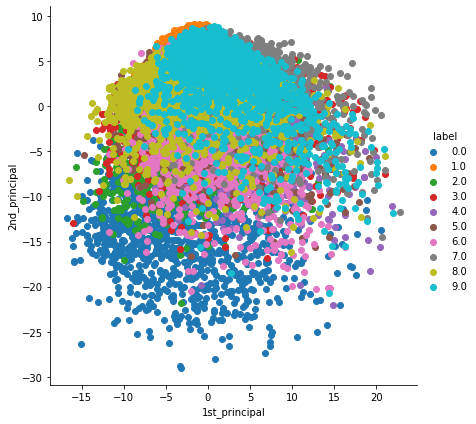

In [ ]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

Scikit-learn 패키지로 구한 것과 우리가 직접 사영한 것이 비슷한 형태로 나타나는 것을 확인할 수 있었습니다. 


---


오늘은 고차원의 데이터를 우리의 눈으로 더 직접적으로 이해하기 위해서 사용하는 dimensionality reduction방법론 중 하나인 principal component analysis 인 PCA를 직접 구현, 그리고 만들어진 패키지를 통해서 알아보았습니다. 

모르는 것이 있으면 언제든지 질문 주세요~~